In [3]:
# Step 1: Load the dataset
import pandas as pd

df = pd.read_csv("customer.csv")
print("First 5 rows of the dataset:")
display(df.head())

print("\nDataset info:")
print(df.info())

print("\nSummary statistics:")
display(df.describe())


First 5 rows of the dataset:


,CustomerID,AnnualIncome,SpendingScore,PurchasesPerMonth
0,C001,45000,39,5
1,C002,54000,81,12
2,C003,60000,6,3
3,C004,80000,77,15
4,C005,35000,40,8



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         100 non-null    object
 1   AnnualIncome       100 non-null    int64 
 2   SpendingScore      100 non-null    int64 
 3   PurchasesPerMonth  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB
None

Summary statistics:


,AnnualIncome,SpendingScore,PurchasesPerMonth
count,100.000000,100.000000,100.000000
mean,63630.000000,57.760000,12.120000
std,15178.836276,22.905656,6.102293
min,30000.000000,6.000000,2.000000
25%,52750.000000,39.750000,6.000000
50%,61500.000000,60.000000,12.000000
75%,72000.000000,78.000000,16.250000
max,120000.000000,95.000000,25.000000


C:\Users\pujar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


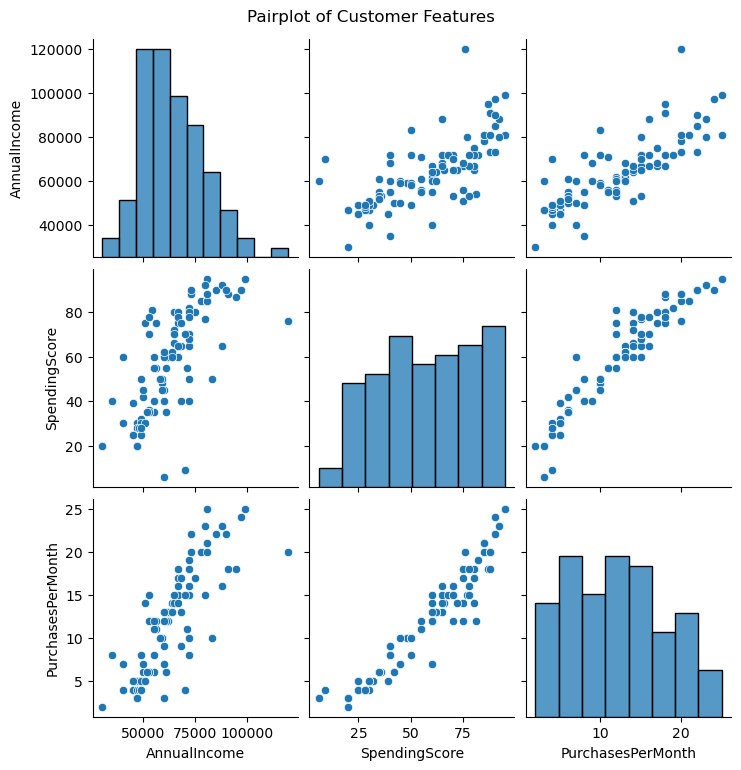

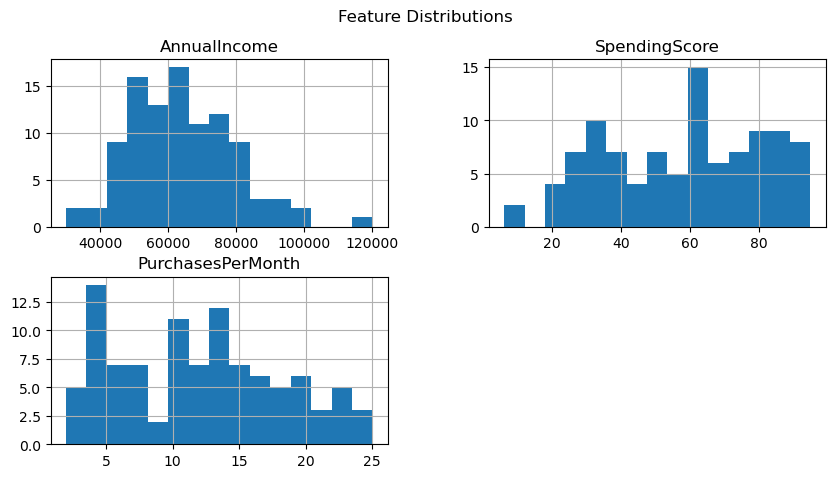

In [4]:
# Step 2: Visualize features
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot of all features
sns.pairplot(df[['AnnualIncome', 'SpendingScore', 'PurchasesPerMonth']])
plt.suptitle("Pairplot of Customer Features", y=1.02)
plt.show()

# Optional: Histogram of each feature
df[['AnnualIncome', 'SpendingScore', 'PurchasesPerMonth']].hist(figsize=(10,5), bins=15)
plt.suptitle("Feature Distributions")
plt.show()


In [5]:
# Step 3: Prepare features for clustering
from sklearn.preprocessing import StandardScaler

# Select only the features for clustering
X = df[['AnnualIncome', 'SpendingScore', 'PurchasesPerMonth']]

# Optional but recommended: Standardize the features
# Scaling ensures each feature contributes equally to distance calculations
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("First 5 rows of scaled features:")
print(X_scaled[:5])


First 5 rows of scaled features:
[[-1.23355007 -0.82313771 -1.17265252]
 [-0.63763216  1.01970791 -0.01976381]
 [-0.24035356 -2.27108783 -1.50204929]
 [ 1.08390846  0.8441988   0.47433136]
 [-1.89568107 -0.77926043 -0.67855736]]


In [6]:
# Step 4: Train KMeans clustering
from sklearn.cluster import KMeans

# Decide number of clusters (k)
k = 3  # You can change this later

# Initialize and train KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Assign cluster labels to the dataset
df['Cluster'] = kmeans.labels_

print("First 5 rows with cluster labels:")
display(df.head())

# Optional: Check how many customers are in each cluster
print("\nNumber of customers in each cluster:")
print(df['Cluster'].value_counts())


C:\Users\pujar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pujar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


First 5 rows with cluster labels:


,CustomerID,AnnualIncome,SpendingScore,PurchasesPerMonth,Cluster
0,C001,45000,39,5,0
1,C002,54000,81,12,2
2,C003,60000,6,3,0
3,C004,80000,77,15,1
4,C005,35000,40,8,0



Number of customers in each cluster:
Cluster
2    43
0    33
1    24
Name: count, dtype: int64


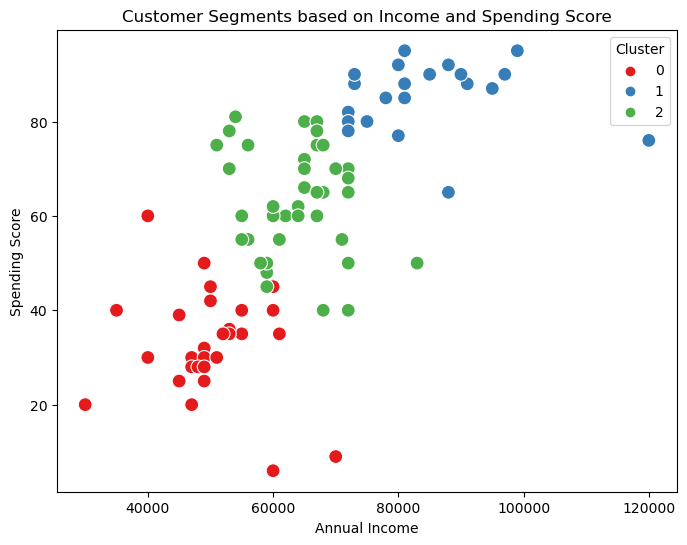

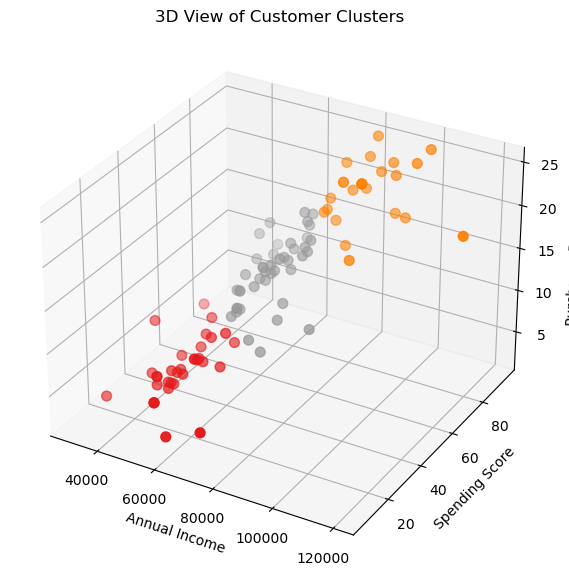

In [7]:
# Step 5: Visualize clusters
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: AnnualIncome vs SpendingScore
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='AnnualIncome',
    y='SpendingScore',
    hue='Cluster',
    palette='Set1',
    data=df,
    s=100
)
plt.title("Customer Segments based on Income and Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend(title="Cluster")
plt.show()

# Optional: 3D plot including PurchasesPerMonth
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    df['AnnualIncome'],
    df['SpendingScore'],
    df['PurchasesPerMonth'],
    c=df['Cluster'],
    cmap='Set1',
    s=50
)
ax.set_xlabel("Annual Income")
ax.set_ylabel("Spending Score")
ax.set_zlabel("Purchases Per Month")
plt.title("3D View of Customer Clusters")
plt.show()


In [8]:
# Step 6: Analyze clusters
cluster_summary = df.groupby('Cluster')[['AnnualIncome', 'SpendingScore', 'PurchasesPerMonth']].mean()
print("Average values in each cluster:")
display(cluster_summary)

# Optional: Count of customers in each cluster
print("\nNumber of customers per cluster:")
print(df['Cluster'].value_counts())


Average values in each cluster:


,AnnualIncome,SpendingScore,PurchasesPerMonth
Cluster,,,
0,49545.454545,31.606061,5.242424
1,83583.333333,85.458333,20.333333
2,63302.325581,62.372093,12.813953



Number of customers per cluster:
Cluster
2    43
0    33
1    24
Name: count, dtype: int64


In [9]:

from sklearn.cluster import KMeans


k = 3  

# Initialize KMeans
kmeans = KMeans(n_clusters=k, random_state=42)

# Train the model
kmeans.fit(X_scaled)  # X_scaled is the standardized feature matrix

# Assign cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

print("Model trained successfully!")
print("\nFirst 5 rows with assigned clusters:")
display(df.head())


C:\Users\pujar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pujar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model trained successfully!

First 5 rows with assigned clusters:


,CustomerID,AnnualIncome,SpendingScore,PurchasesPerMonth,Cluster
0,C001,45000,39,5,0
1,C002,54000,81,12,2
2,C003,60000,6,3,0
3,C004,80000,77,15,1
4,C005,35000,40,8,0


In [10]:

new_customer = [[70000, 70, 12]]


new_customer_scaled = scaler.transform(new_customer)


predicted_cluster = kmeans.predict(new_customer_scaled)[0]
print("New customer belongs to Cluster:", predicted_cluster)


New customer belongs to Cluster: 2


C:\Users\pujar\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [11]:
import os
# Prints the current working directory where this notebook is saved
print("Notebook is saved in this folder:")
print(os.getcwd())

Notebook is saved in this folder:
C:\Users\pujar


In [12]:
import os
# Full path of your notebook file
print("This notebook file path:")
print(os.path.abspath("mlproject1.ipynb"))

# List all files in the current working directory
print("\nFiles in current folder:")
print(os.listdir())



This notebook file path:
C:\Users\pujar\mlproject1.ipynb

Files in current folder:
['.anaconda', '.android', '.bash_history', '.cache', '.conda', '.condarc', '.continuum', '.csss.css', '.eclipse', '.gitconfig', '.gradle', '.hackerearth', '.html', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.m2', '.matplotlib', '.nbi', '.nuget', '.p2', '.sts4', '.vscode', 'anaconda3', 'AndroidStudioProjects', 'AppData', 'Application Data', 'Contacts', 'Cookies', 'customer.csv', 'data1.csv', 'data2.csv', 'data3.csv', 'datascience16june', 'Documents', 'Downloads', 'eclipse', 'eclipse-workspace', 'employee.class', 'exersise.jpynb.ipynb', 'Favorites', 'hiring.csv', 'hiring1.csv', 'home.csv', 'homeprice.csv', 'homeprice1.csv', 'IdeaProjects', 'import urllib.py', 'IntelGraphicsProfiles', 'JPMC-tech-task-1-py3', 'JST', 'linearregression.ipynb', 'Links', 'Local Settings', 'mlproject1.ipynb', 'Music', 'mu_code', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.